<a href="https://colab.research.google.com/github/Mim091/ML_CSE475/blob/main/CSE475_lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor", "gill_attachment", "gill_spacing",
    "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
    "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type",
    "spore_print_color", "population", "habitat"
]
mushroom_df = pd.read_csv(url, header=None, names=column_names)


In [33]:
# Perform EDA
print("Shape of the dataset:", mushroom_df.shape)
print("Summary of the dataset:\n", mushroom_df.describe(include='all'))
print("Missing values:\n", mushroom_df.isnull().sum())
print("Class distribution:\n", mushroom_df['class'].value_counts())

Shape of the dataset: (8124, 23)
Summary of the dataset:
        class cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
count                    8124                   8124      8124       8124   
unique                    

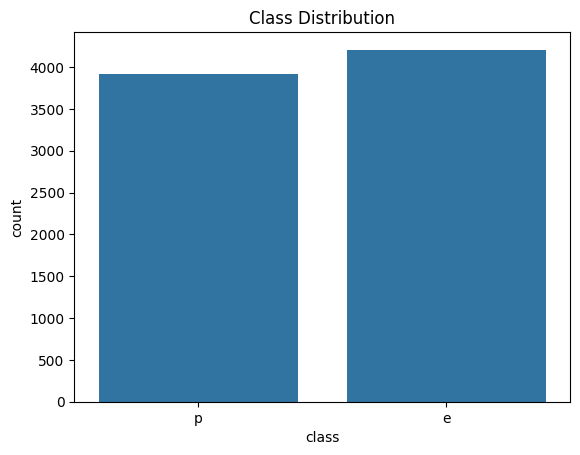

In [10]:
sns.countplot(x='class', data=mushroom_df)
plt.title('Class Distribution')
plt.show()

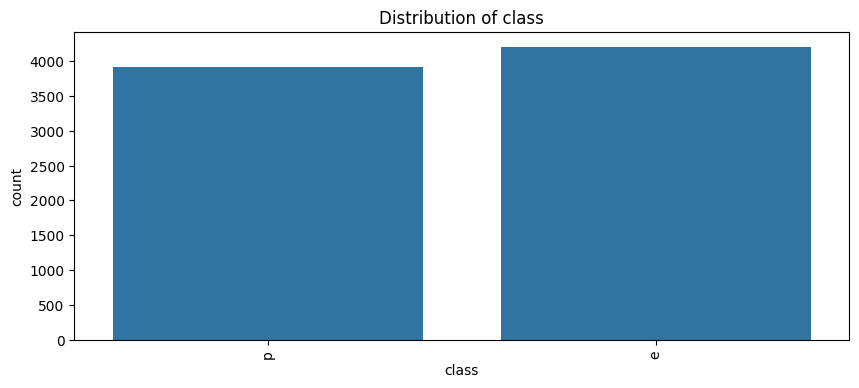

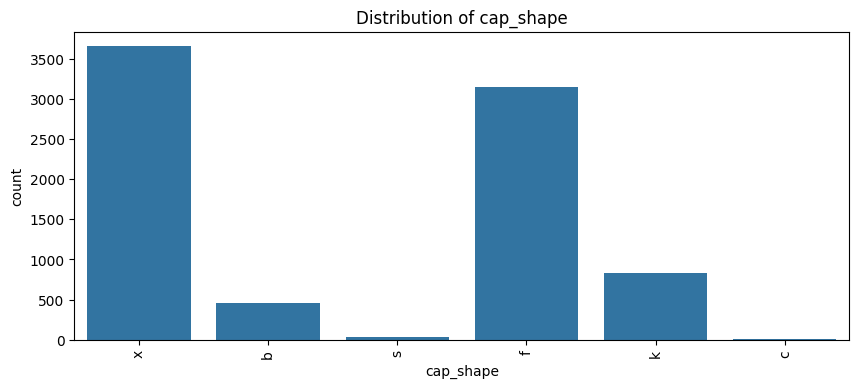

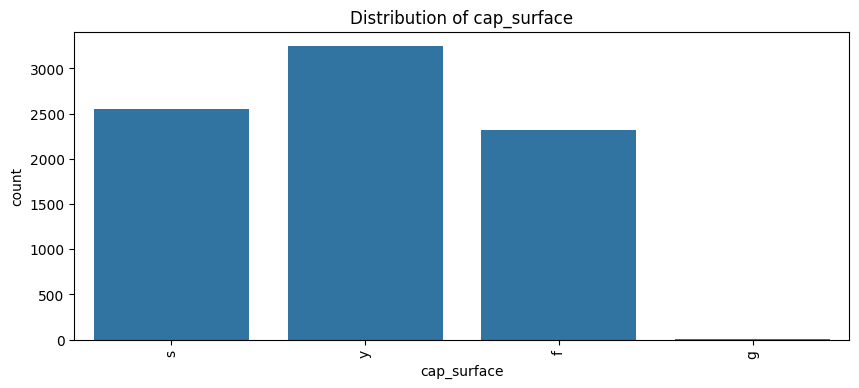

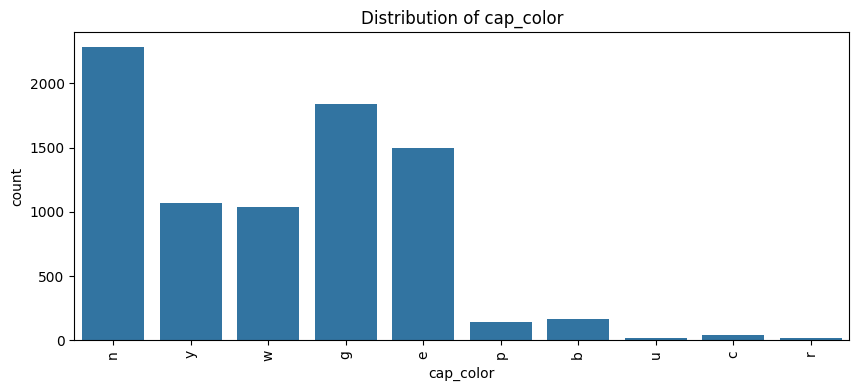

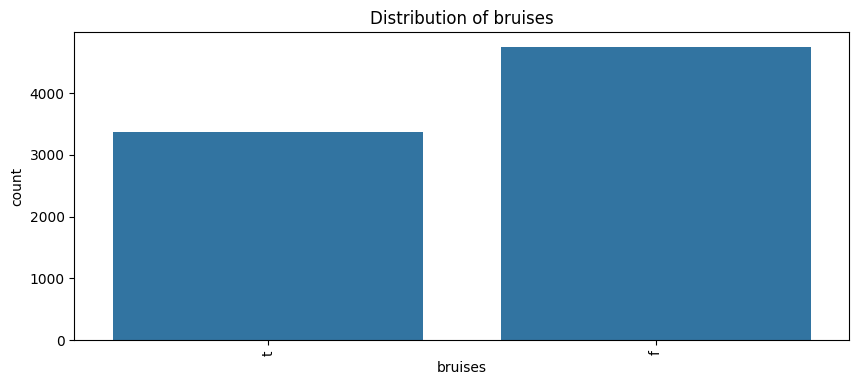

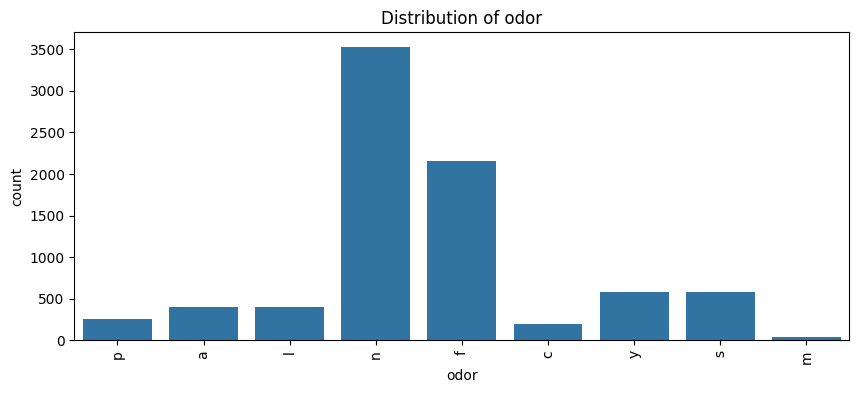

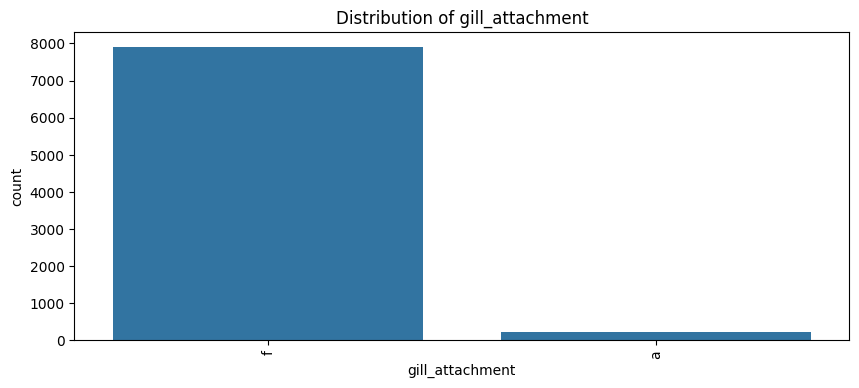

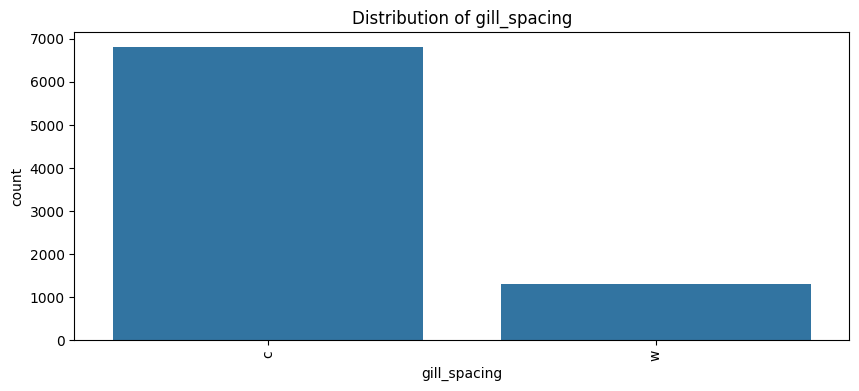

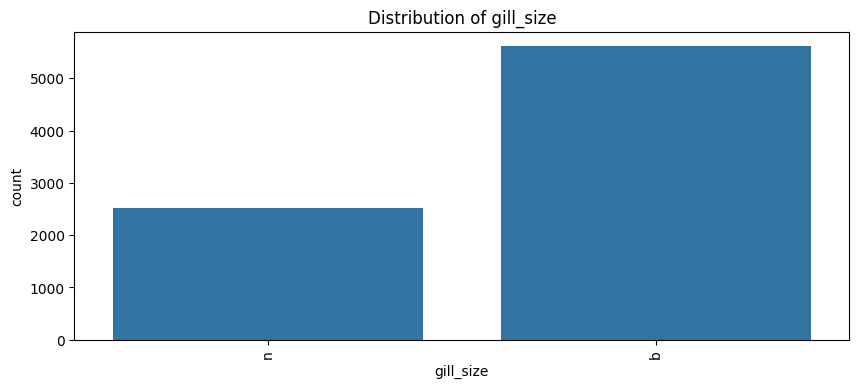

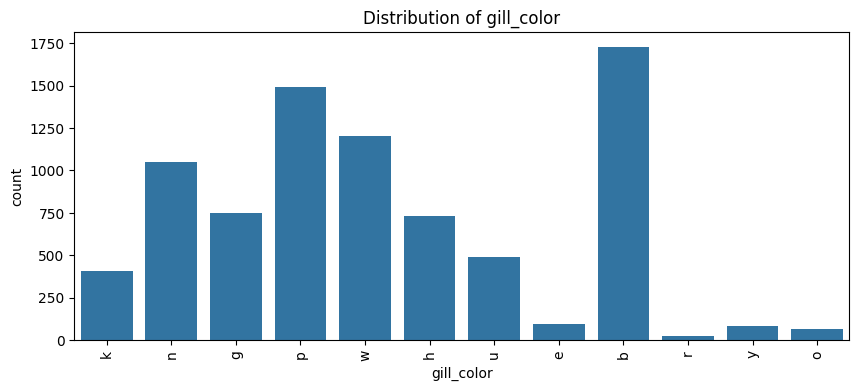

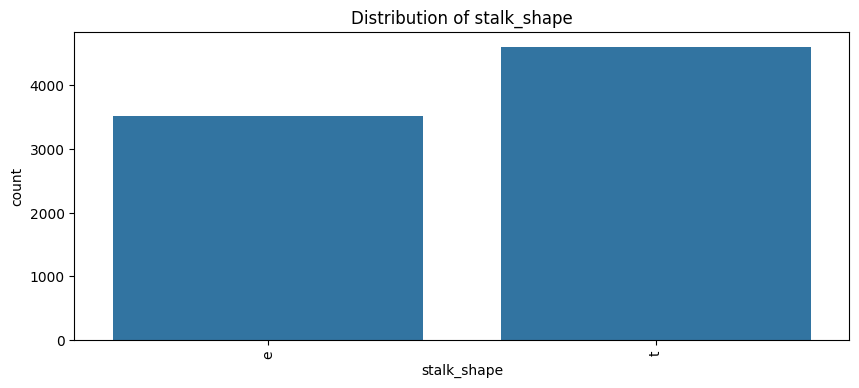

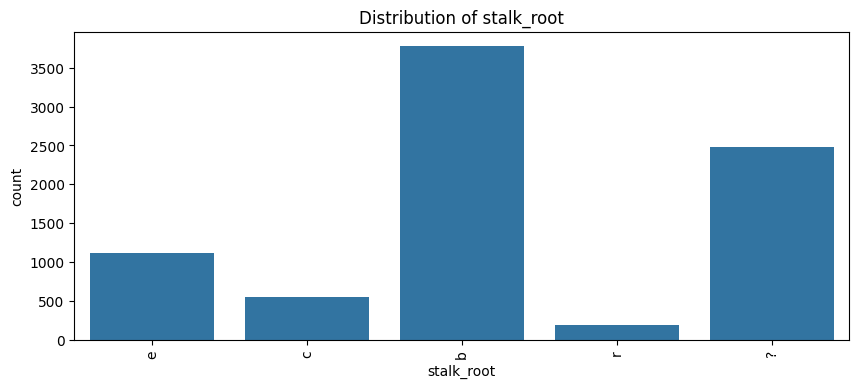

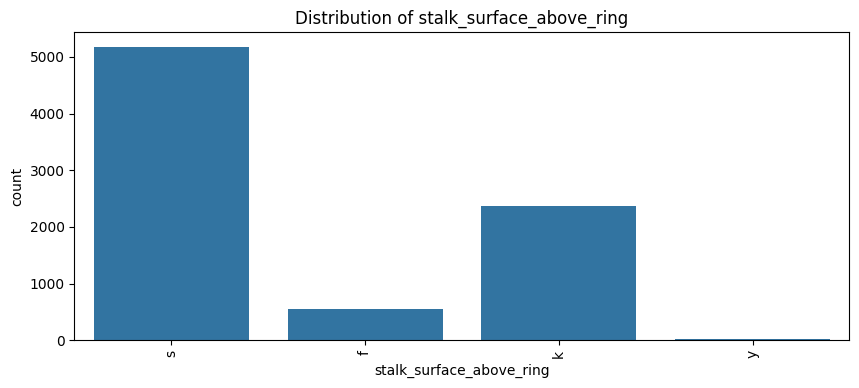

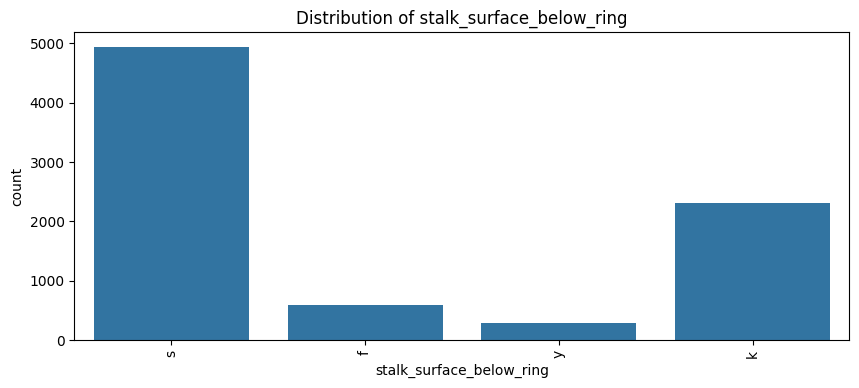

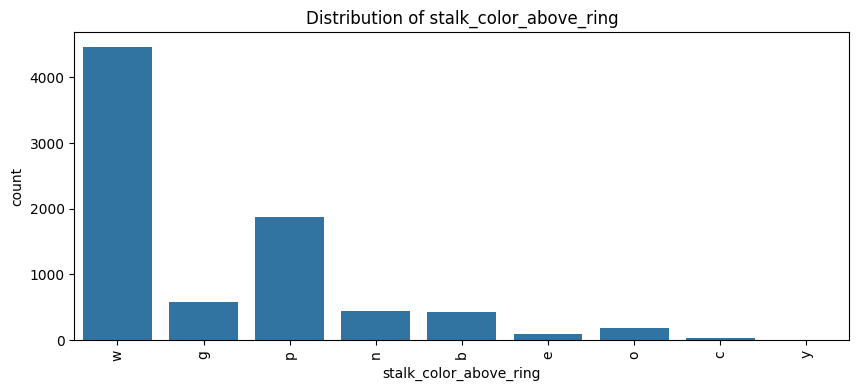

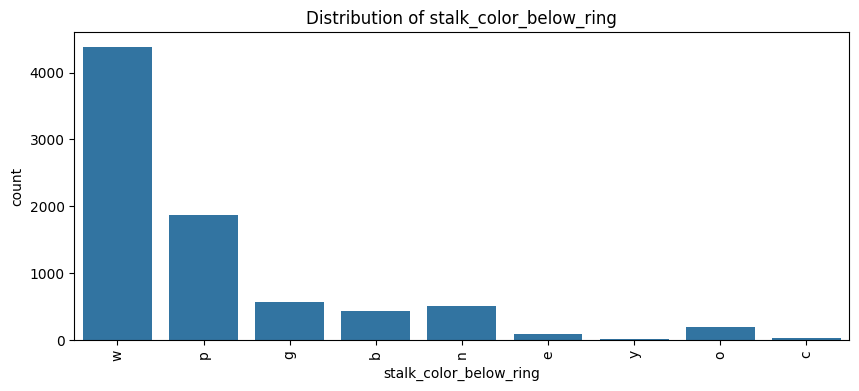

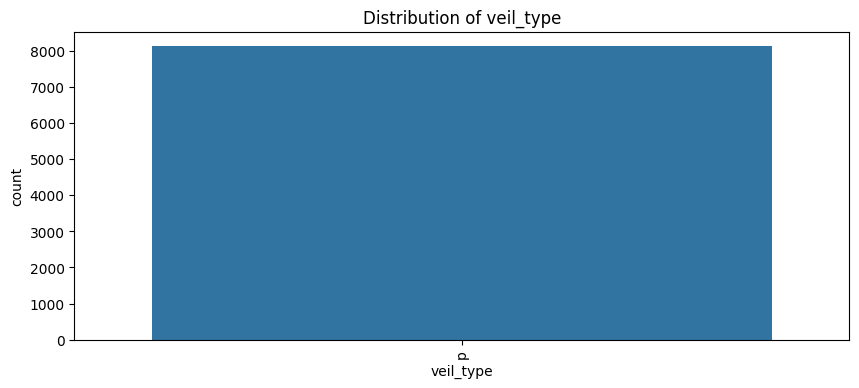

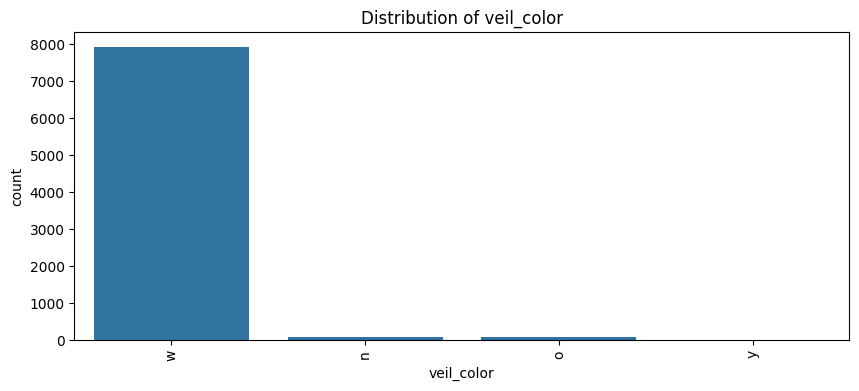

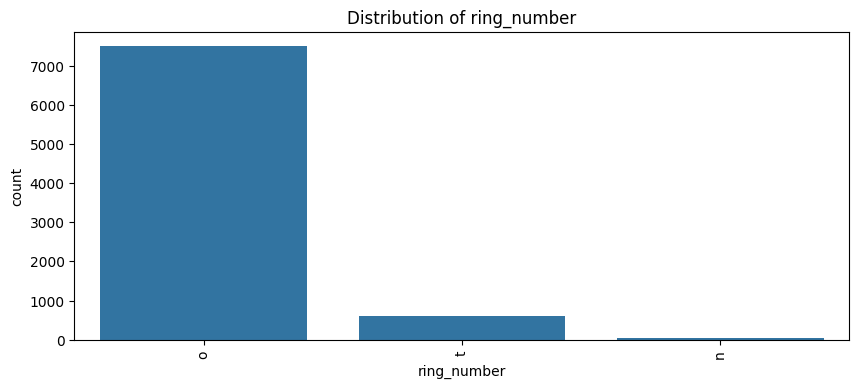

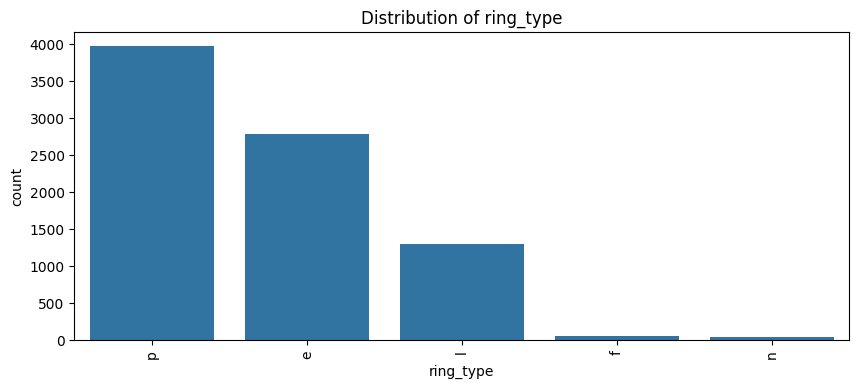

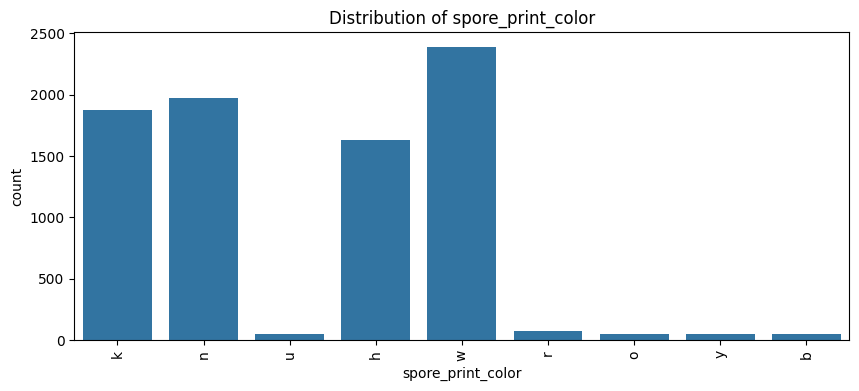

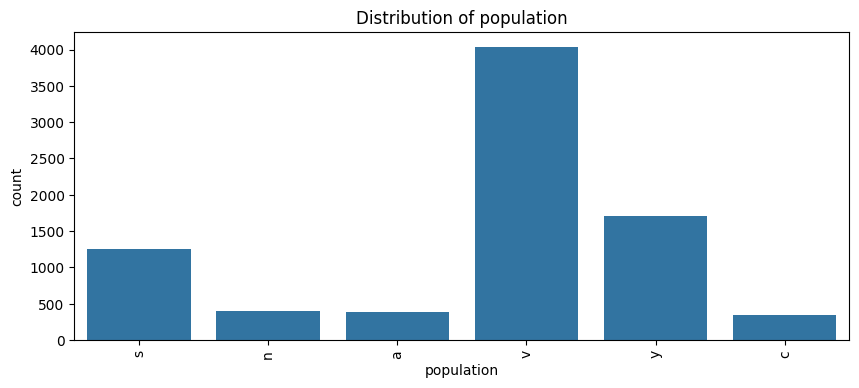

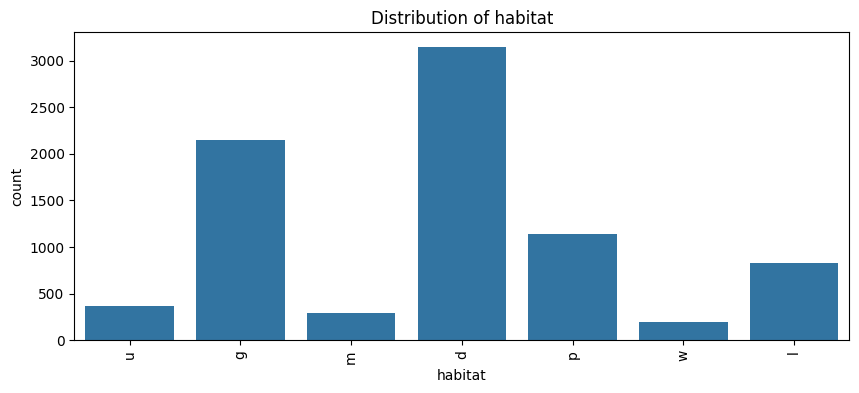

In [11]:
for column in mushroom_df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=mushroom_df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in mushroom_df.columns:
    mushroom_df[column] = labelencoder.fit_transform(mushroom_df[column])

In [13]:
X = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
n_estimators_values = [1, 50, 100, 150, 200, 250]
rf_results = []

In [15]:
for n in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_results.append((n, accuracy))
    print(f'Random Forest with n_estimators={n}: Accuracy = {accuracy:.4f}')

Random Forest with n_estimators=1: Accuracy = 1.0000
Random Forest with n_estimators=50: Accuracy = 1.0000
Random Forest with n_estimators=100: Accuracy = 1.0000
Random Forest with n_estimators=150: Accuracy = 1.0000
Random Forest with n_estimators=200: Accuracy = 1.0000
Random Forest with n_estimators=250: Accuracy = 1.0000


In [16]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree: Accuracy = {dt_accuracy:.4f}')

Decision Tree: Accuracy = 0.9520


In [17]:
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt, average='macro')
rec = recall_score(y_test, y_pred_dt, average='macro')
f1 = f1_score(y_test, y_pred_dt, average='macro')

In [18]:
print(f"Decision Tree Accuracy: {acc:.2f}")
print(f"Decision Tree Precision: {prec:.2f}")
print(f"Decision Tree Recall: {rec:.2f}")
print(f"Decision Tree F1-score: {f1:.2f}")

Decision Tree Accuracy: 0.95
Decision Tree Precision: 0.95
Decision Tree Recall: 0.95
Decision Tree F1-score: 0.95


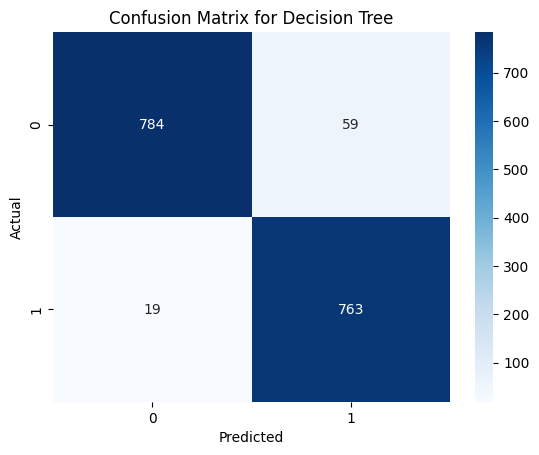

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       843
           1       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [19]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

print(classification_report(y_test, y_pred_dt))

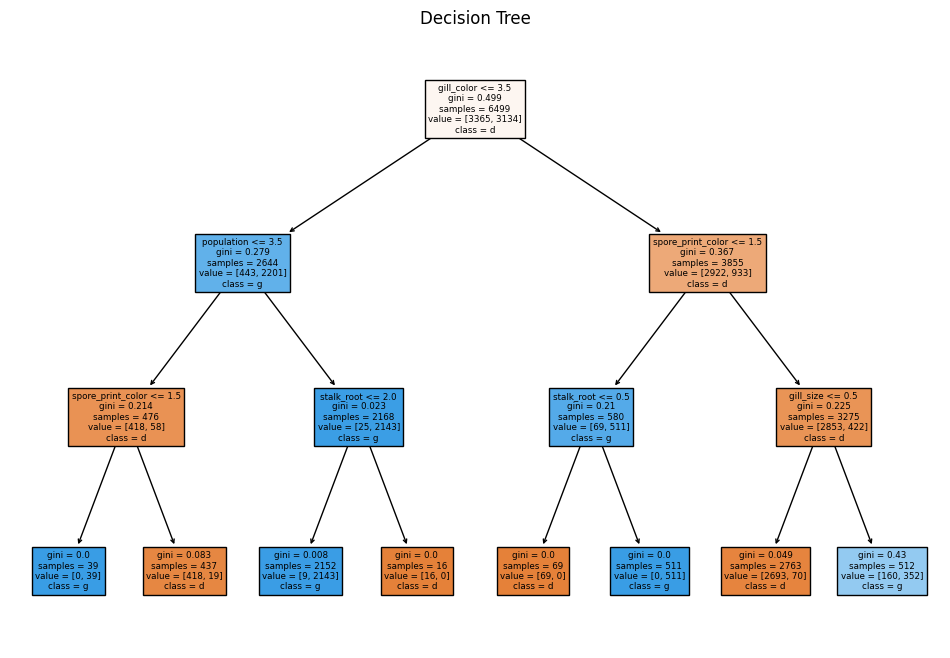

In [20]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=column_names[1:], class_names=labelencoder.classes_, filled=True)
plt.title('Decision Tree')
plt.show()

In [28]:
best_rf_n = n_estimators_values[rf_results.index(max(rf_results, key=lambda x: x[1]))]
best_rf_model = RandomForestClassifier(n_estimators=best_rf_n, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
print(f"\nClassification Report for Random Forest with n_estimators={best_rf_n}:")
print(classification_report(y_test, y_pred_best_rf))


Classification Report for Random Forest with n_estimators=1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



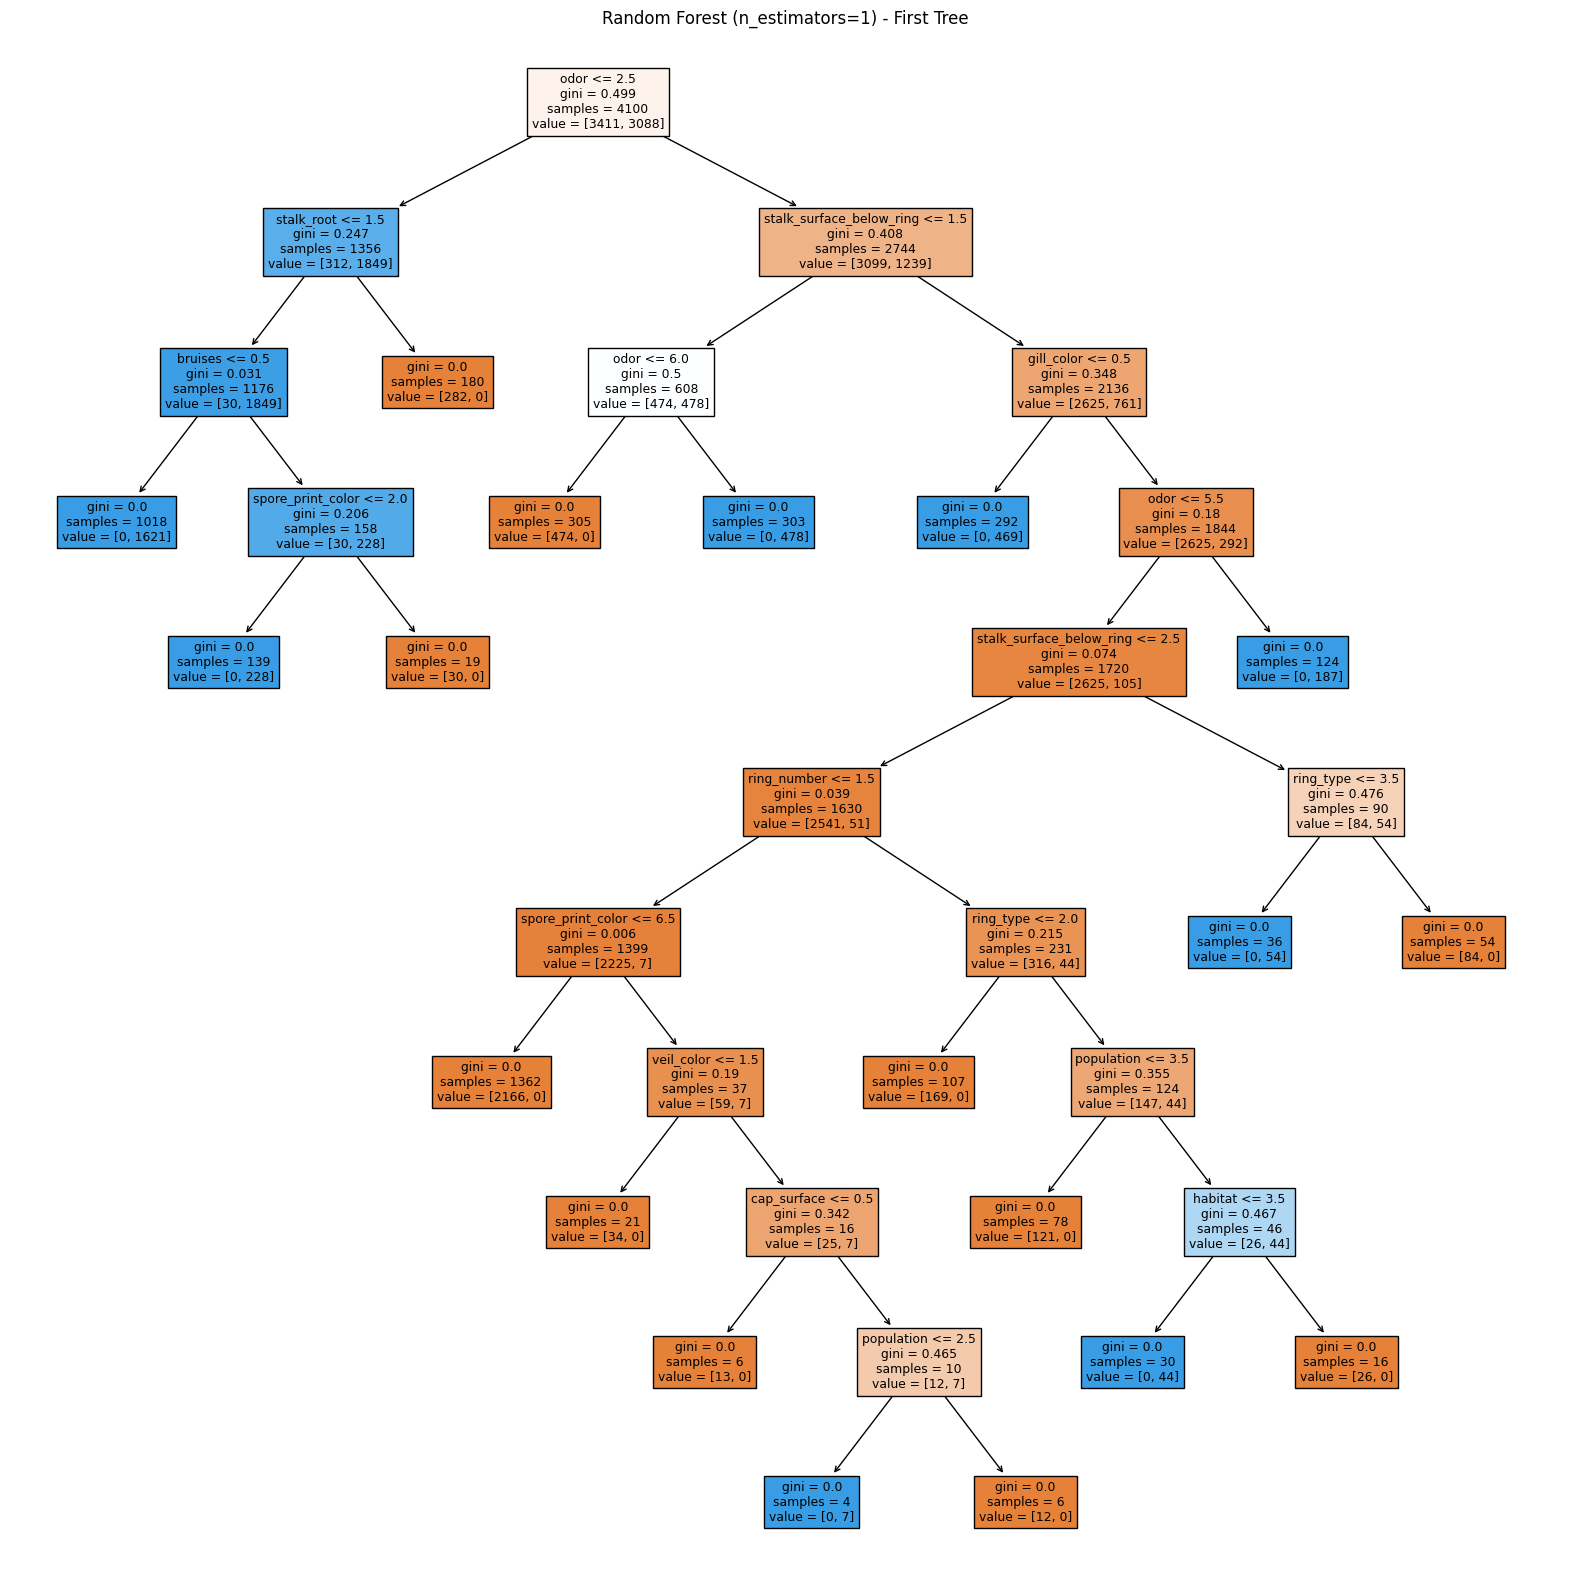

In [29]:
plt.figure(figsize=(20, 20))
plot_tree(best_rf_model.estimators_[0], feature_names=column_names[1:], filled=True)
plt.title(f'Random Forest (n_estimators={best_rf_n}) - First Tree')
plt.show()